Εργασία 4 - Ημι-επιβλεπόμενη Μάθηση & Αξιολόγηση Μοντέλων

Ευθυμιάδης Κωνσταντίνος<br>
ΑΕΜ: 240

## Εισαγωγή Βιβλιοθηκών

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text
from sklearn.metrics import mean_absolute_error

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Πρώτο Μέρος- Ημι-επιβλεπόμενη Μάθηση

## Πρώτο Ερώτημα

### Εισαγωγή Δεδομένων

In [2]:
df= pd.read_csv("wine-missing.csv")
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,unknown,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,unknown,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,unknown,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,unknown,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### Περιγραφή Χαρακτηριστικών

In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


### Δημιουργία Ιστογράμματος για κάθε χαρακτηριστικό

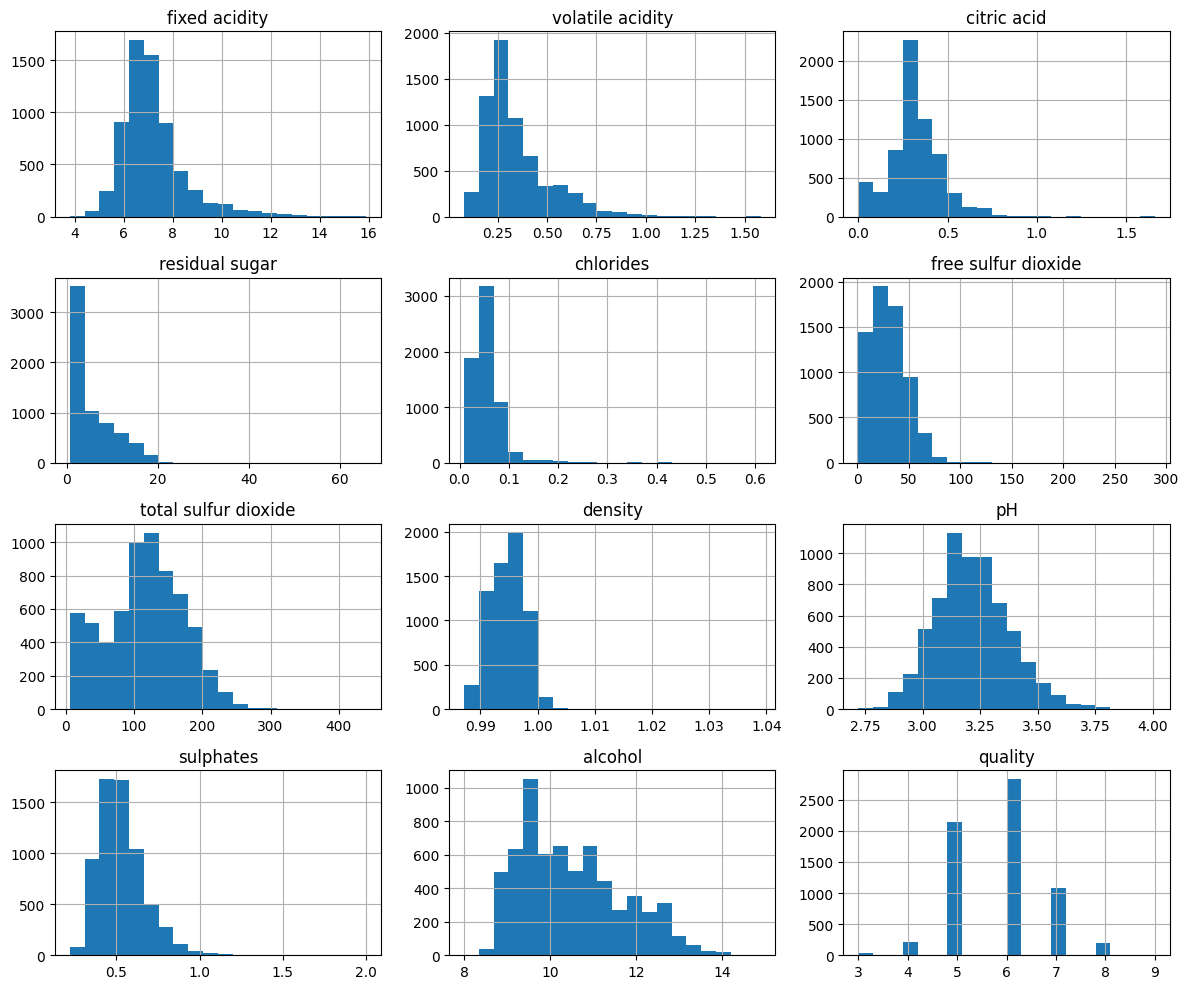

In [4]:
df.hist(figsize=(12,10), bins=20)
plt.tight_layout()
plt.show()

### Δημιουργία Ραβδογράμματος για την μεταβλητή Type

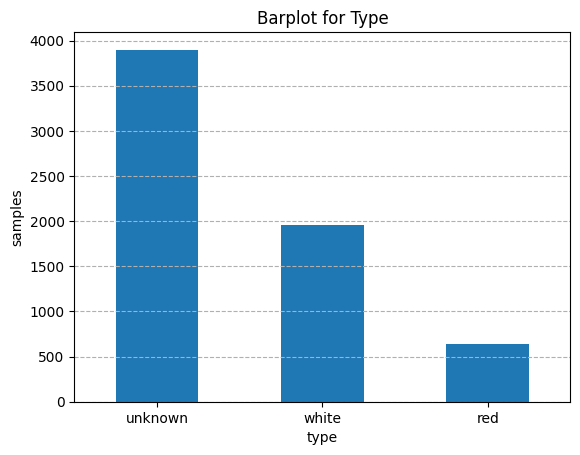

In [5]:
type_counts= df['type'].value_counts()

type_counts.plot(kind='bar')
plt.title("Barplot for Type")
plt.xlabel("type")
plt.ylabel("samples")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.show()

## Δεύτερο Ερώτημα

### Μετατροπή των τιμών της μεταβλητής type σε αριθμούς

In [6]:
df['type']= df['type'].map({'white': 0, 'red': 1, 'unknown': 2})

### Δημιουργία numpy arrays x (input) και y (target)

In [7]:
input_df= df.drop(columns= ['type'])
targets_df= df['type']

x= input_df.to_numpy()
y= targets_df.to_numpy()

x.shape, y.shape

((6497, 12), (6497,))

## Τρίτο Ερώτημα

### Δημιουργία συνόλου δεδομένων για τις γνωστές τιμές της μεταβλητής type

In [8]:
mask_known= (y != 2)

x_known= x[mask_known]
y_known= y[mask_known]
x_known.shape, y_known.shape

((2599, 12), (2599,))

### Δημιουργία συνόλου δεδομένων για τις άγνωστες τιμές της μεταβλητής type

In [9]:
x_unknown= x[~mask_known]
x_unknown.shape

(3898, 12)

## Τέταρτο Ερώτημα

### Χωρισμός δεδομένων για το σύνολο δεδομένων με τις γνωστές τιμές του type

In [10]:
x_train, x_test, y_train, y_test = train_test_split(
    x_known, y_known, train_size=0.70, random_state=42, stratify= y_known
)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1819, 12), (1819,), (780, 12), (780,))

## Πέμπτο Ερώτημα

### Εκπαίδευση Random Forest

In [11]:
random_forest_clf= RandomForestClassifier(random_state= 42)
random_forest_clf.fit(x_train, y_train)

y_pred_train = random_forest_clf.predict(x_train)
y_pred_test = random_forest_clf.predict(x_test)

print("Accuracy:")
print("1. At train test: ", accuracy_score(y_train, y_pred_train))
print("2. At test test: ", accuracy_score(y_test, y_pred_test))

print()
print("Precision:")
print("1. At train test: ", precision_score(y_train, y_pred_train))
print("2. At test test: ", precision_score(y_test, y_pred_test))

print()
print("Recall:")
print("1. At train test: ", recall_score(y_train, y_pred_train))
print("2. At test test: ", recall_score(y_test, y_pred_test))

print()
print("f1-score:")
print("1. At train test: ", f1_score(y_train, y_pred_train))
print("2. At test test: ", f1_score(y_test, y_pred_test))

Accuracy:
1. At train test:  0.999450247388675
2. At test test:  0.9987179487179487

Precision:
1. At train test:  0.9977728285077951
2. At test test:  0.9948186528497409

Recall:
1. At train test:  1.0
2. At test test:  1.0

f1-score:
1. At train test:  0.9988851727982163
2. At test test:  0.9974025974025974


### Πιο αντιπροσωπευτική μετρική για το συγκεκριμένο dataset

In [12]:
counter=0
for temp in y_train:
  counter+= temp

print("At train set:")
print("White wine: ", round((len(y_train)-counter)*100/len(y_train), 2),"%")
print("Red wine: ", round(counter*100/len(y_train), 2),"%")

counter=0
for temp in y_test:
  counter+= temp

print()
print("At test set:")
print("White wine: ", round((len(y_test)-counter)*100/len(y_test), 2),"%")
print("Red wine: ", round(counter*100/len(y_test), 2),"%")

At train set:
White wine:  75.37 %
Red wine:  24.63 %

At test set:
White wine:  75.38 %
Red wine:  24.62 %


Σύμφωνα με το παραπάνω, παρατηρούμε ότι οι κλάσεις είναι μη-ισορροπημένες. Αυτό έχει ως αποτέλεσμα η μετρική accuracy να μην είναι τόσο αξιόπιστη, αφού μπορεί να είναι υψηλή ακόμα και αν αγνοεί σχεδόν τελείως την μικρότερη κατηγορία, δηλαδή την red-wine.<br>
Επομένως, η μετρική f1-score είναι πιο αντιπροσωπευτική, αφού συμπεριλαμβάνει το precision αλλά και το recall, αξιολογώντας πιο αποδοτικά την απόδοση του dataset

## Έκτο Ερώτημα

### Επανεκπαίδευση Random Forest με class_weight=’balanced’

In [13]:
random_forest_clf= RandomForestClassifier(random_state= 42, class_weight= 'balanced')
random_forest_clf.fit(x_train, y_train)

y_pred_train = random_forest_clf.predict(x_train)
y_pred_test = random_forest_clf.predict(x_test)

print("Accuracy:")
print("1. At train test: ", accuracy_score(y_train, y_pred_train))
print("2. At test test: ", accuracy_score(y_test, y_pred_test))

print()
print("Precision:")
print("1. At train test: ", precision_score(y_train, y_pred_train))
print("2. At test test: ", precision_score(y_test, y_pred_test))

print()
print("Recall:")
print("1. At train test: ", recall_score(y_train, y_pred_train))
print("2. At test test: ", recall_score(y_test, y_pred_test))

print()
print("f1-score:")
print("1. At train test: ", f1_score(y_train, y_pred_train))
print("2. At test test: ", f1_score(y_test, y_pred_test))

Accuracy:
1. At train test:  0.999450247388675
2. At test test:  0.9948717948717949

Precision:
1. At train test:  0.9977728285077951
2. At test test:  0.9947368421052631

Recall:
1. At train test:  1.0
2. At test test:  0.984375

f1-score:
1. At train test:  0.9988851727982163
2. At test test:  0.9895287958115183


Για κάθε μία κλάση, η class_weight προσδίδει ένα βάρος. Με την χρήση class_weight='balance', προσδίδονται βάρη αντιστρόφως ανάλογα με τις συχνότητες εμφάνισης της κάθε κλάσης. Έτσι οι κλάσεις με λιγότερα δείγματα αποκτούν μεγαλύτερη σημασία κατά την εκπαίδευση.

## Έβδομο Ερώτημα

### Υπολογισμός πιθανοτήτων για κάθε κλάση του μοντέλου στο σύνολο x_unknown

In [14]:
y_unknown_proba=random_forest_clf.predict_proba(x_unknown)
y_unknown_proba

array([[1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       ...,
       [0.01, 0.99],
       [0.01, 0.99],
       [0.01, 0.99]])

## Όγδοο Ερώτημα

In [15]:
y_unknown_pred= []

red_wine_index = list(random_forest_clf.classes_).index(1)

for proba in y_unknown_proba:
  if proba[red_wine_index]>0.65:
    y_unknown_pred.append(1)
  elif proba[red_wine_index]<0.35:
    y_unknown_pred.append(0)
  else:
    y_unknown_pred.append(2)

## Ένατο Ερώτημα

### Δημιουργία confident mask

In [16]:
y_unknown_pred_np_array= np.array(y_unknown_pred)

confident_mask= (y_unknown_pred_np_array != 2)

x_unknown_masked= x_unknown[confident_mask]
y_unknown_pred_np_array_masked= y_unknown_pred_np_array[confident_mask]

x_unknown = x_unknown[~confident_mask]

### Ένωση συνόλων

In [17]:
x_train = np.vstack((x_train, x_unknown_masked))
y_train = np.concatenate((y_train, y_unknown_pred_np_array_masked))

x_train.shape, y_train.shape

((5666, 12), (5666,))

### Επανεκπαίδευση του Random Forest

In [18]:
random_forest_clf= RandomForestClassifier(random_state= 42, class_weight= 'balanced')
random_forest_clf.fit(x_train, y_train)

y_pred_train = random_forest_clf.predict(x_train)
y_pred_test = random_forest_clf.predict(x_test)

print("Accuracy:")
print("1. At train test: ", accuracy_score(y_train, y_pred_train))
print("2. At test test: ", accuracy_score(y_test, y_pred_test))

print()
print("Precision:")
print("1. At train test: ", precision_score(y_train, y_pred_train))
print("2. At test test: ", precision_score(y_test, y_pred_test))

print()
print("Recall:")
print("1. At train test: ", recall_score(y_train, y_pred_train))
print("2. At test test: ", recall_score(y_test, y_pred_test))

print()
print("f1-score:")
print("1. At train test: ", f1_score(y_train, y_pred_train))
print("2. At test test: ", f1_score(y_test, y_pred_test))

Accuracy:
1. At train test:  0.9998235086480762
2. At test test:  0.9948717948717949

Precision:
1. At train test:  0.9992630803242447
2. At test test:  0.9947368421052631

Recall:
1. At train test:  1.0
2. At test test:  0.984375

f1-score:
1. At train test:  0.9996314043494287
2. At test test:  0.9895287958115183


## Δέκατο Ερώτημα

In [19]:
high_confidence = True

iteration=0
while high_confidence:
  y_unknown_proba=random_forest_clf.predict_proba(x_unknown)

  y_unknown_pred= []

  red_wine_index = list(random_forest_clf.classes_).index(1)

  for proba in y_unknown_proba:
    if proba[red_wine_index]>0.65:
      y_unknown_pred.append(1)
    elif proba[red_wine_index]<0.35:
      y_unknown_pred.append(0)
    else:
      y_unknown_pred.append(2)

  y_unknown_pred_np_array= np.array(y_unknown_pred)

  confident_mask= (y_unknown_pred_np_array != 2)

  high_confidence = confident_mask.sum() > 0

  if high_confidence:
    x_unknown_masked= x_unknown[confident_mask]
    y_unknown_pred_np_array_masked= y_unknown_pred_np_array[confident_mask]
    x_unknown = x_unknown[~confident_mask]

    x_train = np.vstack((x_train, x_unknown_masked))
    y_train = np.concatenate((y_train, y_unknown_pred_np_array_masked))

    random_forest_clf= RandomForestClassifier(random_state= 42, class_weight= 'balanced')
    random_forest_clf.fit(x_train, y_train)

    y_pred_train = random_forest_clf.predict(x_train)
    y_pred_test = random_forest_clf.predict(x_test)

    print("At iteration:",iteration)
    print("Accuracy:")
    print("1. At train test: ", accuracy_score(y_train, y_pred_train))
    print("2. At test test: ", accuracy_score(y_test, y_pred_test))

    print()
    print("Precision:")
    print("1. At train test: ", precision_score(y_train, y_pred_train))
    print("2. At test test: ", precision_score(y_test, y_pred_test))

    print()
    print("Recall:")
    print("1. At train test: ", recall_score(y_train, y_pred_train))
    print("2. At test test: ", recall_score(y_test, y_pred_test))

    print()
    print("f1-score:")
    print("1. At train test: ", f1_score(y_train, y_pred_train))
    print("2. At test test: ", f1_score(y_test, y_pred_test))
    print()
    print()

    iteration+=1

At iteration: 0
Accuracy:
1. At train test:  0.9998242221831605
2. At test test:  0.9961538461538462

Precision:
1. At train test:  0.9992684711046086
2. At test test:  1.0

Recall:
1. At train test:  1.0
2. At test test:  0.984375

f1-score:
1. At train test:  0.9996341017197219
2. At test test:  0.9921259842519685


At iteration: 1
Accuracy:
1. At train test:  0.9998242839571253
2. At test test:  0.9961538461538462

Precision:
1. At train test:  0.9992690058479532
2. At test test:  1.0

Recall:
1. At train test:  1.0
2. At test test:  0.984375

f1-score:
1. At train test:  0.9996343692870201
2. At test test:  0.9921259842519685


At iteration: 2
Accuracy:
1. At train test:  0.9998244382022472
2. At test test:  0.9974358974358974

Precision:
1. At train test:  0.9992706053975201
2. At test test:  1.0

Recall:
1. At train test:  1.0
2. At test test:  0.9895833333333334

f1-score:
1. At train test:  0.9996351696461145
2. At test test:  0.9947643979057592


At iteration: 3
Accuracy:
1. A

# Μέρος 2 - Αξιολόγηση Μοντέλων

## Πρώτο Ερώτημα

### Εισαγωγή Δεδομένων

In [20]:
df= pd.read_csv("wine-full.csv")
df['type']= df['type'].map({'white': 0, 'red': 1})
df = df.fillna(df.mean())
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,6
1,0,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,6
2,0,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,6
3,0,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6
4,0,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,1,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5
6493,1,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,6
6494,1,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,6
6495,1,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5


### Αναπαράσταση του quality

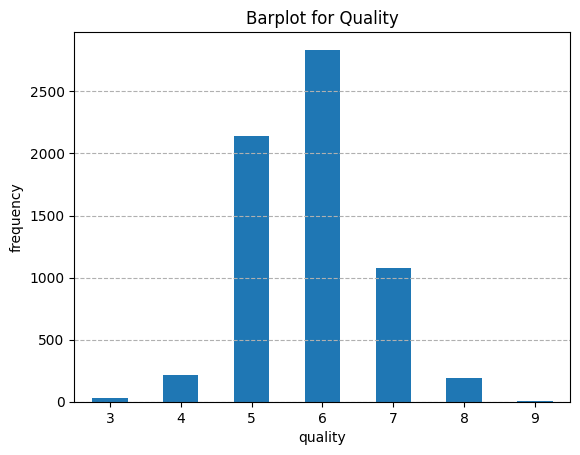

In [21]:
type_counts= df['quality'].value_counts().sort_index()

type_counts.plot(kind='bar')
plt.title("Barplot for Quality")
plt.xlabel("quality")
plt.ylabel("frequency")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.show()

Σύμφωνα με το παραπάνω ραβδόγραμμα, παρατηρούμε ότι οι τιμές στο quality δεν είναι ισορροπημένες. Υπάρχουν αρκετά περισσότερες τιμές με ποιότητα 5, 6 και 7 σε σχέση με τις τιμές 3, 4, 8 και 9.

## Δεύτερο Ερώτημα

### Barplots για Red και White Wines αντίστοιχα

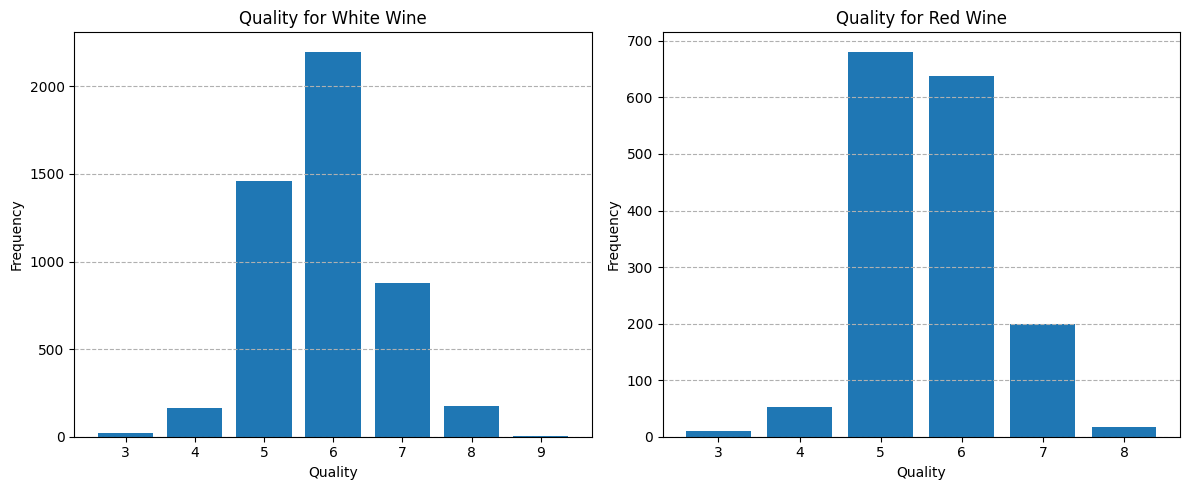

In [22]:
counts_of_red_wine= df[df['type'] == 1]['quality'].value_counts().sort_index()
counts_of_white_wine= df[df['type'] == 0]['quality'].value_counts().sort_index()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))


axes[0].bar(counts_of_white_wine.index, counts_of_white_wine.values)
axes[0].set_title("Quality for White Wine")
axes[0].set_xlabel("Quality")
axes[0].set_ylabel("Frequency")
axes[0].grid(axis='y', linestyle='--')
axes[0].set_xticks(counts_of_white_wine.index)

axes[1].bar(counts_of_red_wine.index, counts_of_red_wine.values)
axes[1].set_title("Quality for Red Wine")
axes[1].set_xlabel("Quality")
axes[1].set_ylabel("Frequency")
axes[1].grid(axis='y', linestyle='--')
axes[1].set_xticks(counts_of_red_wine.index)

plt.tight_layout()
plt.show()

### Μέσοι Όροι για Red και White Wines αντίστοιχα

In [23]:
mean_of_red_wine= df[df['type'] == 1]['quality'].mean()
mean_of_white_wine= df[df['type'] == 0]['quality'].mean()

std_of_red_wine= df[df['type'] == 1]['quality'].std()
std_of_white_wine= df[df['type'] == 0]['quality'].std()

print("At White Wine:")
print("Mean: ", mean_of_white_wine, ", Std: ", std_of_white_wine)
print()
print("At Red Wine:")
print("Mean: ", mean_of_red_wine, ", Std: ", std_of_red_wine)

At White Wine:
Mean:  5.87790935075541 , Std:  0.8856385749678454

At Red Wine:
Mean:  5.6360225140712945 , Std:  0.8075694397347023


### Αναπαράσταση Boxplot

/tmp/ipython-input-441205276.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([quality_for_white_wine, quality_for_red_wine], labels=['White Wine', 'Red Wine'])


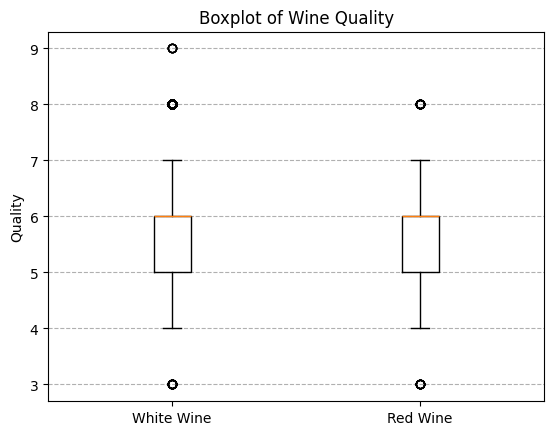

In [24]:
quality_for_white_wine = df[df['type']== 0]['quality']
quality_for_red_wine   = df[df['type']== 1]['quality']

plt.boxplot([quality_for_white_wine, quality_for_red_wine], labels=['White Wine', 'Red Wine'])
plt.title("Boxplot of Wine Quality")
plt.ylabel("Quality")
plt.grid(axis='y', linestyle='--')
plt.show()

Σύμφωνα με τα παραπάνω (μέση τιμή και std, και boxplot), παρατηρείται ότι σύμφωνα με το dataset, το λευκό κρασί έχει ελαφρώς καλύτερη ποιότητα σε σχέση με το κόκκινο

## Τρίτο Ερώτημα

### Χωρισμός κρασιών σε γλυκό και ξηρό

In [25]:
threshold_of_sugar_at_wines= df['residual sugar'].median()

df_with_high_sugars= df[df['residual sugar'] > threshold_of_sugar_at_wines]
df_with_low_sugars=  df[df['residual sugar'] < threshold_of_sugar_at_wines]

### Μέσοι Όροι για τα κρασιά με υψυλά και χαμηλά ζάκχαρα αντίστοιχα

In [26]:
mean_for_high_sugars= df_with_high_sugars['quality'].mean()
std_for_high_sugars= df_with_high_sugars['quality'].std()

mean_for_low_sugars= df_with_low_sugars['quality'].mean()
std_for_low_sugars= df_with_low_sugars['quality'].std()

print("For High Sugar Wines:")
print("Mean: ", mean_for_high_sugars, ", Std: ", std_for_high_sugars)
print()
print("For Low Sugar Wines:")
print("Mean: ", mean_for_low_sugars, ", Std: ", std_for_low_sugars)

For High Sugar Wines:
Mean:  5.829721362229102 , Std:  0.8700563568967968

For Low Sugar Wines:
Mean:  5.808372093023256 , Std:  0.8787493145270369


### Αναπαράσταση Boxplot

/tmp/ipython-input-2189444209.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([quality_for_high_sugar_wines, quality_for_low_sugar_wines],


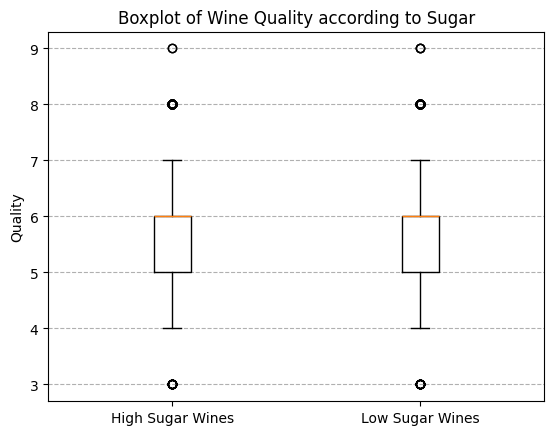

In [27]:
quality_for_high_sugar_wines = df_with_high_sugars['quality']
quality_for_low_sugar_wines  = df_with_low_sugars['quality']

plt.boxplot([quality_for_high_sugar_wines, quality_for_low_sugar_wines],
            labels=['High Sugar Wines', 'Low Sugar Wines'])
plt.title("Boxplot of Wine Quality according to Sugar")
plt.ylabel("Quality")
plt.grid(axis='y', linestyle='--')
plt.show()

Ο διαχωρισμός των κρασιών πραγματοποιήθηκεμε με την χρήση του median. Παρατηρείται ότι τα κρασιά με σάκχαρα παραπάνω από το median έχουν λίγο καλύτερη ποιότητα.

## Τέταρτο Ερώτημα

### Δημιουργία numpy arrays x (input) και y (target)

In [28]:
input_df= df.drop(columns= ['quality'])
target_df= df['quality']

x= input_df.to_numpy()
y= target_df.to_numpy()

x.shape, y.shape

((6497, 12), (6497,))

### Χωρισμός Δεδομένων σε σύνολα train και test

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((5847, 12), (5847,), (650, 12), (650,))

## Πέμπτο Ερώτημα

### Δημιουργία και Εκπαίδευση DecisionTreeRegressor μοντέλου

In [30]:
decision_tree_regressor= DecisionTreeRegressor(random_state= 0)
decision_tree_regressor.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

### Υπολογισμός Σφάλματος με την χρήση MAE

In [31]:
y_pred= decision_tree_regressor.predict(x_test)
mae= mean_absolute_error(y_test, y_pred)

print("MAE is: ", mae)

MAE is:  0.46153846153846156


## Έκτο Ερώτημα

In [32]:
list_with_all_mae= []

for seed in range(10):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state= seed)

  decision_tree_regressor= DecisionTreeRegressor(random_state= 0)
  decision_tree_regressor.fit(x_train, y_train)

  y_pred= decision_tree_regressor.predict(x_test)
  mae= mean_absolute_error(y_test, y_pred)

  list_with_all_mae.append(mae)

  print("With seed= ",seed, " MAE is: ", mae)

print("Mean: ", np.mean(list_with_all_mae))
print("Std: ", np.std(list_with_all_mae))

With seed=  0  MAE is:  0.46153846153846156
With seed=  1  MAE is:  0.5015384615384615
With seed=  2  MAE is:  0.4169230769230769
With seed=  3  MAE is:  0.4723076923076923
With seed=  4  MAE is:  0.4969230769230769
With seed=  5  MAE is:  0.4430769230769231
With seed=  6  MAE is:  0.48
With seed=  7  MAE is:  0.4553846153846154
With seed=  8  MAE is:  0.4492307692307692
With seed=  9  MAE is:  0.47692307692307695
Mean:  0.46538461538461534
Std:  0.02432764517018914


Σύμφωνα με την εκφώνηση, η τιμή quality λαμβάνει τιμές από 0 έως 10. Ο μέσος όρος της MAE είναι περίπου 0.46. Αυτό σημαίνει ότι οι προβλέψεις του μοντέλου θα έχουν ένα σφάλμα μικρότερο από μισή μονάδα
<br>
Η χαμηλή τυπική απόκλιση των μετρήσεων για το mae, δείχνουν ότι το μοντέλο είναι αξιόπιστο, με αποτέλεσμα το σφάλμα να μην επηρεάζεται σημαντικά από την τυχαιότητα στον διαχωρισμό των δεδομένων σε train και test sets.

## Έβδομο Ερώτημα

### Χωρισμός του train set, σε train και validation

In [33]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.8, random_state=0)
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((4677, 12), (4677,), (1170, 12), (1170,))

### Δημιουργία Λίστας Συνδυασμών για fine-tuning

In [34]:
criteria = ["friedman_mse", "absolute_error"]
max_depths = [None, 3, 5]
min_samples_splits = [2, 5]

all_combinations= []

for criterion in criteria:
  for max_depth in max_depths:
    for min_samples_split in min_samples_splits:
      temp_tuple= (criterion, max_depth, min_samples_split)
      all_combinations.append(temp_tuple)

extra_params = [
    ("poisson", None, 2),
    ("poisson", None, 5),
    ("poisson", 3, 5)
]

all_combinations.extend(extra_params)
len(all_combinations)

15

### Υπολογισμός MAE για κάθε έναν συνδυασμό

In [35]:
results= []
for combination in all_combinations:
  model= DecisionTreeRegressor(criterion= combination[0],
                               max_depth= combination[1],
                               min_samples_split= combination[2],
                               random_state= 0
                               )
  model.fit(x_train, y_train)

  y_pred_train= model.predict(x_train)
  y_pred_val= model.predict(x_val)

  mae_for_train= mean_absolute_error(y_train, y_pred_train)
  mae_for_val= mean_absolute_error(y_val, y_pred_val)

  results.append({
      'criterion': combination[0],
      'max_depth': combination[1],
      'min_samples_split': combination[2],
      'mae_for_train': mae_for_train,
      'mae_for_val': mae_for_val
  })

results_df= pd.DataFrame(results)
results_df

,criterion,max_depth,min_samples_split,mae_for_train,mae_for_val
0,friedman_mse,NaN,2,0.000000,0.512821
1,friedman_mse,NaN,5,0.066816,0.525926
2,friedman_mse,3.0,2,0.585343,0.610147
3,friedman_mse,3.0,5,0.585343,0.610147
4,friedman_mse,5.0,2,0.544960,0.600127
5,friedman_mse,5.0,5,0.544960,0.600127
6,absolute_error,NaN,2,0.000000,0.541026
7,absolute_error,NaN,5,0.064999,0.560684
8,absolute_error,3.0,2,0.514646,0.507692
9,absolute_error,3.0,5,0.514646,0.507692


### Εύρεση Καλύτερων Συνδυασμών

#### Καλύτεροι Συνδυασμοί με βάση το MAE στο train set

In [36]:
min_mae_at_train= results_df['mae_for_train'].min()

df_with_min_mae_at_train= results_df[results_df['mae_for_train'] == min_mae_at_train]
df_with_min_mae_at_train

,criterion,max_depth,min_samples_split,mae_for_train,mae_for_val
0,friedman_mse,NaN,2,0.0,0.512821
6,absolute_error,NaN,2,0.0,0.541026
12,poisson,NaN,2,0.0,0.519658


#### Καλύτεροι Συνδυασμοί με βάση το MAE στο validation set

In [37]:
min_mae_at_val= results_df['mae_for_val'].min()

df_with_min_mae_at_val= results_df[results_df['mae_for_val'] == min_mae_at_val]
df_with_min_mae_at_val

,criterion,max_depth,min_samples_split,mae_for_train,mae_for_val
8,absolute_error,3.0,2,0.514646,0.507692
9,absolute_error,3.0,5,0.514646,0.507692


## Όγδοο Ερώτημα

Για την επιλογή υπερπαραμέτρων είναι περισσότερο αξιόπιστο να χρησιμοποιήσουμε το validation set, αφού το συγκεκριμένο δεν χρησιμοποιήθηκε για την εκπαίδευση του μοντέλου. Αυτό έχει ως αποτέλεσμα να μειώνεται ο κίνδυνος του overfitting (που μπορεί να προκύψει αν βασιστούμε στο mae για το train set), ενώ επιπλέον προσφέρει μια πιο αντικειμενική αξιολόγηση σε άγνωστα δεδομένα.

## Ένατο Ερώτημα

### Ορισμός Συνόλου Δεδομένων

In [38]:
input_df= df.drop(columns= ['quality'])
target_df= df['quality']

x= input_df.to_numpy()
y= target_df.to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

### Ορισμός παραμέτρων

In [39]:
criteria = ["friedman_mse", "absolute_error"]
max_depths = [None, 3, 5]
min_samples_splits = [2, 5, 8]

params_for_grid= {
    'criterion': criteria,
    "max_depth": max_depths,
    "min_samples_split": min_samples_splits
}

### Ορισμός μοντέλου και GridSearchCV

In [40]:
model= DecisionTreeRegressor(random_state=0)

grid_search= GridSearchCV(
    estimator= model,
    param_grid= params_for_grid,
    scoring= 'neg_mean_absolute_error',
    n_jobs= -1,
    cv= 10
)

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
print("Best parameters", best_params)

Best parameters {'criterion': 'friedman_mse', 'max_depth': None, 'min_samples_split': 2}


## Δέκατο Ερώτημα

### Χρησιμοποίση καλύτερου μοντέλου για εύρεση MAE στο test set

In [41]:
best_model= grid_search.best_estimator_

y_pred= best_model.predict(x_test)

mae= mean_absolute_error(y_test, y_pred)
print("MAE at the best model is: ", mae)

MAE at the best model is:  0.4523076923076923


Η πιο αξιόπιστη μεθοδολογία είναι η χρήση της μεθόδου cross-validation για την εύρεση του καλύτερου συνδυασμού. Με αυτή την μέθοδο, το validation αλλάζει σε κάθε επάναληψη, οπότε δεν βασιζόμαστε μόνο σε ένα, μειώνοντας τον κίνδυνο του overfitting. Με αυτόν τον τρόπο, είναι πιο αντικειμενική η επιλογή των υπερπαραμέτρων.

## Ενδέκατο Ερώτημα

### Ορισμός παραμέτρων

In [42]:
criteria = ["friedman_mse", "absolute_error"]
max_depths = [5]
min_samples_splits = [2, 5, 8]

params_for_grid= {
    'criterion': criteria,
    "max_depth": max_depths,
    "min_samples_split": min_samples_splits
}

### Ορισμός μοντέλου και GridSearchCV

In [43]:
model= DecisionTreeRegressor(random_state=0)

grid_search= GridSearchCV(
    estimator= model,
    param_grid= params_for_grid,
    scoring= 'neg_mean_absolute_error',
    n_jobs= -1,
    cv= 10
)

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
print("Best parameters", best_params)

Best parameters {'criterion': 'absolute_error', 'max_depth': 5, 'min_samples_split': 2}


### Εμφάνιση Δέντρου

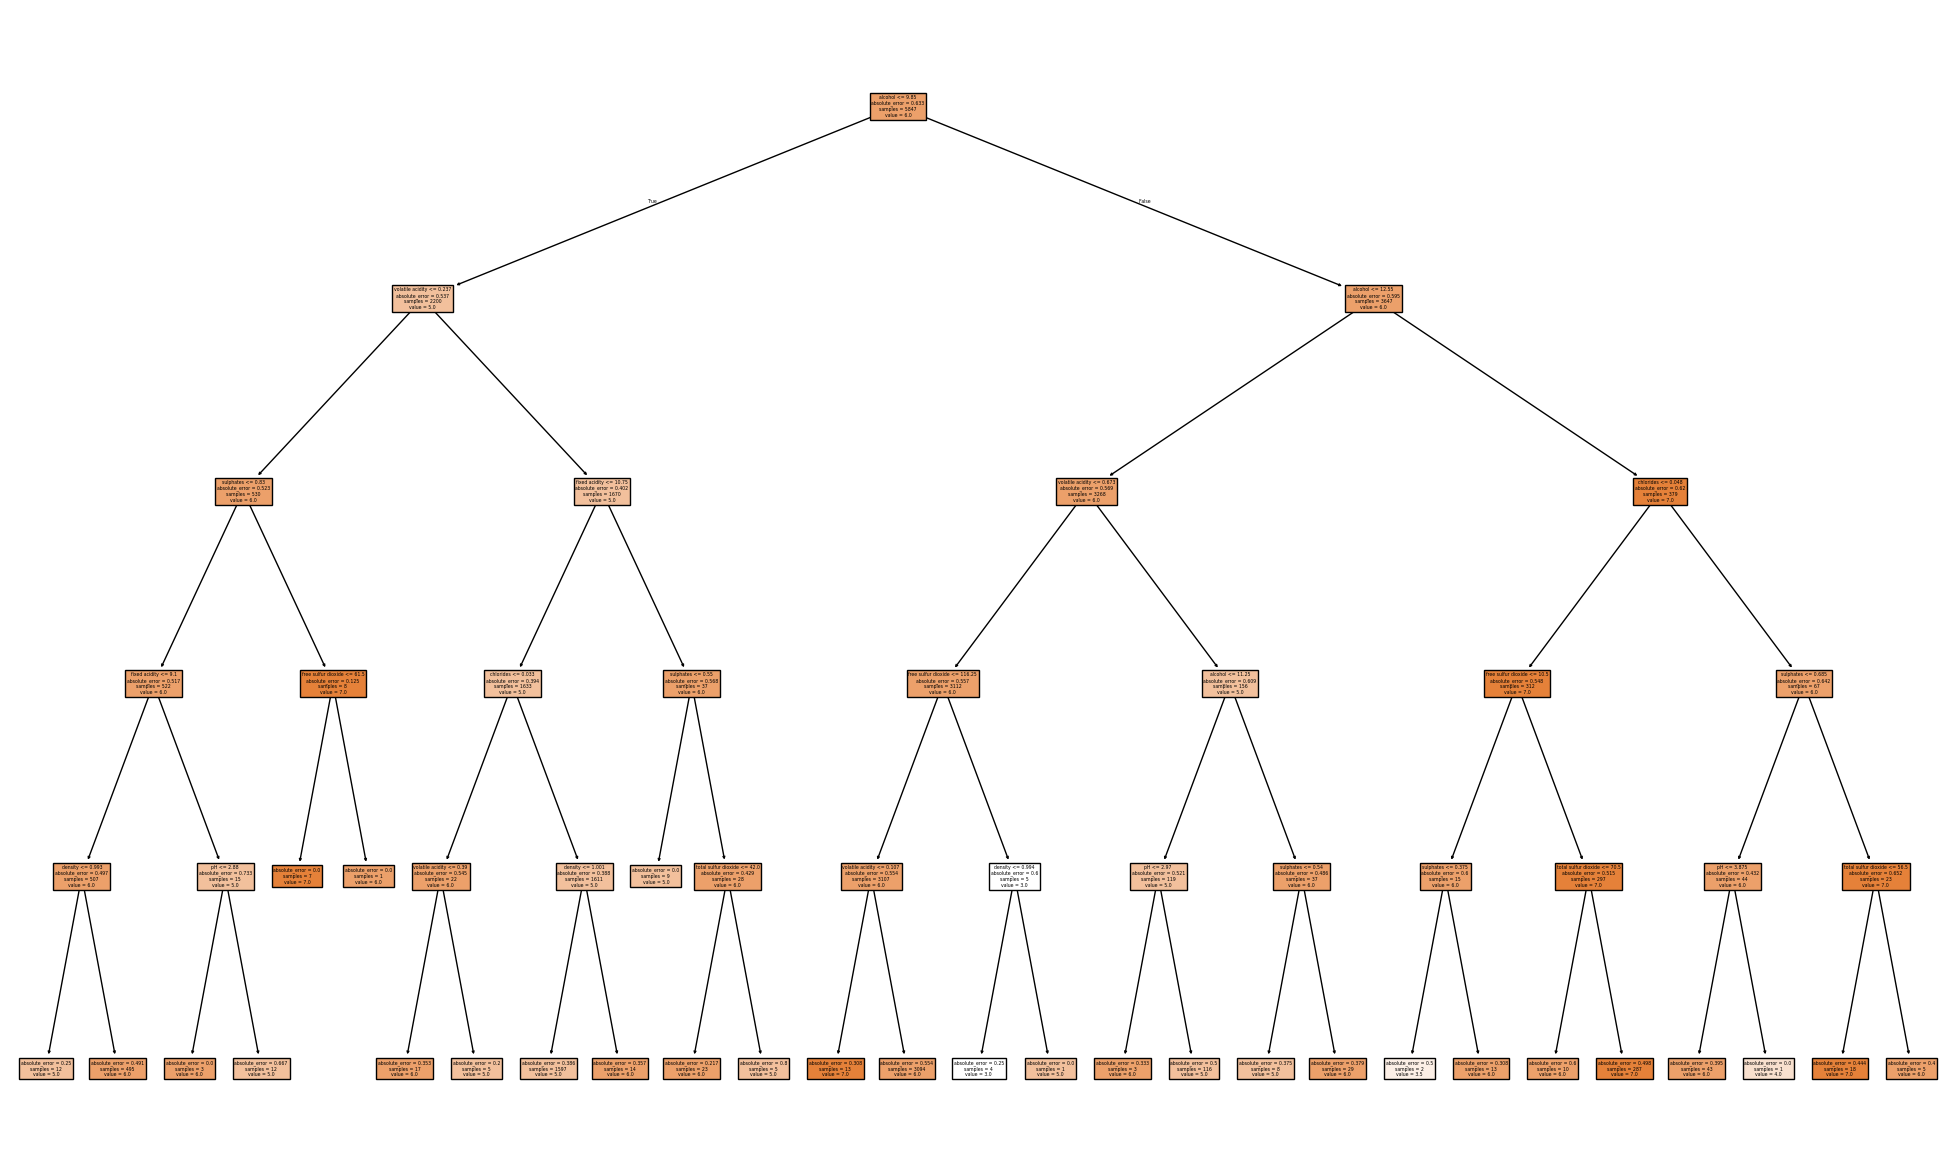

In [44]:
best_model = grid_search.best_estimator_

plt.figure(figsize=(25, 15))
plot_tree(
    best_model,
    filled=True,
    feature_names=df.columns[:-1]
)
plt.show()

### Εμφάνιση Κανόνων

In [45]:
rules_of_best_model = export_text(best_model, feature_names=df.columns[:-1])
print(rules_of_best_model)

|--- alcohol <= 9.85
|   |--- volatile acidity <= 0.24
|   |   |--- sulphates <= 0.83
|   |   |   |--- fixed acidity <= 9.10
|   |   |   |   |--- density <= 0.99
|   |   |   |   |   |--- value: [5.00]
|   |   |   |   |--- density >  0.99
|   |   |   |   |   |--- value: [6.00]
|   |   |   |--- fixed acidity >  9.10
|   |   |   |   |--- pH <= 2.88
|   |   |   |   |   |--- value: [6.00]
|   |   |   |   |--- pH >  2.88
|   |   |   |   |   |--- value: [5.00]
|   |   |--- sulphates >  0.83
|   |   |   |--- free sulfur dioxide <= 61.50
|   |   |   |   |--- value: [7.00]
|   |   |   |--- free sulfur dioxide >  61.50
|   |   |   |   |--- value: [6.00]
|   |--- volatile acidity >  0.24
|   |   |--- fixed acidity <= 10.75
|   |   |   |--- chlorides <= 0.03
|   |   |   |   |--- volatile acidity <= 0.39
|   |   |   |   |   |--- value: [6.00]
|   |   |   |   |--- volatile acidity >  0.39
|   |   |   |   |   |--- value: [5.00]
|   |   |   |--- chlorides >  0.03
|   |   |   |   |--- density <= 1.00
| 

### Δημιουργία Ραβδογράμματος για την σημαντικότητα κάθε χαρακτηριστικού

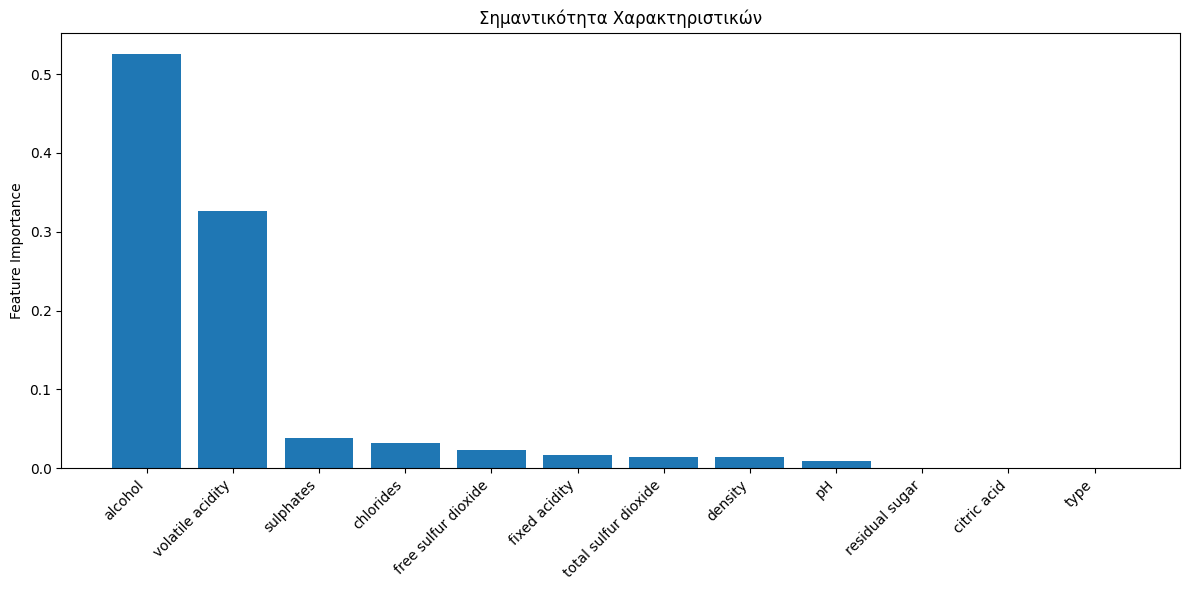

In [46]:
feature_importances = best_model.feature_importances_
feature_names = df.columns[:-1]

indices = np.argsort(feature_importances)[::-1]

sorted_features = feature_names[indices]
sorted_importances = feature_importances[indices]

plt.figure(figsize=(12, 6))
plt.bar(sorted_features, sorted_importances)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Feature Importance")
plt.title("Σημαντικότητα Χαρακτηριστικών")
plt.tight_layout()
plt.show()